### Movies Recommendation System

This notebook is to introduce the recommender system that recommend movies for user based on different kind of recommendations: movies' popularity, user interests, movies having same actors, directors, etc. We will use demographic filtering and content based filtering 

In [ ]:
import numpy as np 
import pandas as pd 
df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [2]:
# Preprocessing 
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   objec

In [3]:
# check for NA values in df1 
df1.isna().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [4]:
# check for NA values in df2
df2.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [51]:
# merge 2 data set based on id 
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')
df2.head()

,level_0,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,...,cast_x,crew_x,director,soup,tittle_y,cast_y,crew_y,tittle,cast,crew
0,0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,...,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,3,3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,...,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan,dccomics crimefighter terrorist christianbale ...,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,4,4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",...,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton,basedonnovel mars medallion taylorkitsch lynnc...,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Demographic Filtering 
This filter is suitable to recommend movies for all kinds of users, not based on particular interets of each user
We will use IMDB's weighted ratinf (WR) which is given as:
\begin{equation}                                    
                                    WR = {\frac{vR}{v+m}}+{\frac{mC}{v+m}}
\end{equation}               
where, <br>
v: is the number of votes for the movie <br>
m: is the minimum votes required to be listed in the chart <br>
R: is the average rating of the movie <br>
C: is the mean vote across the whole report 

In [6]:
# compute the average mean for the whole report
C = df2['vote_average'].mean()
C

6.092171559442011

In [7]:
# compute the minium votes require. We used 90% as a threshold 
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [8]:
# create a new data set which contains only movies having more than m votes
new_df = df2.copy().loc[df2['vote_count'] >= m]
new_df.shape

(481, 23)

In [48]:
# This is function computing the Weighted Rating 
def weighted_rating(x, m = m , C = C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m)*R) + (m/(v+m)*C)

In [10]:
# create a new column name 'score' which is socre of weighted rating of each movie
new_df['score'] = new_df.apply(weighted_rating, axis = 1)

In [11]:
# print out results
new_df = new_df.sort_values('score', ascending = False)
new_df[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular movies now')

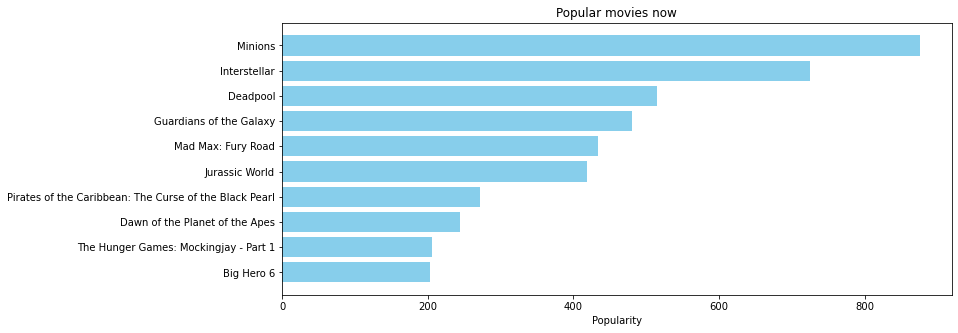

In [49]:
# Look for what movies are trending now based on the attribute 'popularity'
pop = df2.sort_values('popularity', ascending = False)
import matplotlib.pyplot as plt 
plt.figure(figsize = (12,5))
plt.barh(pop['title'].head(10), pop['popularity'].head(10), align = 'center', color = 'skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Popularity')
plt.title('Popular movies now')

### Content Based Filtering
In this section, we will do text processing using Term Frequency - Inverse Document Frequency (TF-IDF).

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(stop_words = 'english', lowercase = True)
df2['overview'] = df2['overview'].fillna('na')
tf_idf_matrix = tf_idf.fit_transform(df2['overview'])
tf_idf_matrix.shape

(4803, 20979)

We will be using the cosine similiarity to calculate a numeric qunatity the denotes similarity between two movies. Using the cosin similarity score is good choice since it is independent of magnitude and is relatively easy and fast to calculate

In [14]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tf_idf_matrix, tf_idf_matrix)


In [15]:
# Construct a reverse map of indices and movies titles
indices = pd.Series(df2.index, index = df2['title']).drop_duplicates()

In [16]:
# Function that takes in movie title as input and outputs are most similar movies 
def get_recommendations(title, cosine_sim = cosine_sim):

    # get the index of movie that matches the title
    indx = indices[title]
    # get the pairwise similarity scores of all movies with particular one 
    sim_scores = list(enumerate(cosine_sim[indx]))
    # sort the score 
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # get score of 10 most similar movies 
    sim_scores = sim_scores[1:11]
    # get the movies indices 
    movies_indices = [i[0] for i in sim_scores]
    # return the top 10 movies 
    return df2['title'].iloc[movies_indices]
    

In [17]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

### Credits, Genres and Keywords Based Recommender
The quality of recommender would be incresed with the usage of better metadata. We are going to buid a recommender based on the following metadata: top 3 actors, directoes, related gernes and the movie plot keywords.

In [18]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

Below is the functions that will help us extract the required information from each features above

In [19]:
# get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [20]:
# return the list top 3 elements or entire list; whichever is more 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names 
    return []

In [21]:
# define new director, casr, genres and keywords features that are in suitable form
df2['director'] = df2['crew'].apply(get_director)
features = ['cast','keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [22]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(10)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"
5,Spider-Man 3,"[Tobey Maguire, Kirsten Dunst, James Franco]",Sam Raimi,"[dual identity, amnesia, sandstorm]","[Fantasy, Action, Adventure]"
6,Tangled,"[Zachary Levi, Mandy Moore, Donna Murphy]",Byron Howard,"[hostage, magic, horse]","[Animation, Family]"
7,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",Joss Whedon,"[marvel comic, sequel, superhero]","[Action, Adventure, Science Fiction]"
8,Harry Potter and the Half-Blood Prince,"[Daniel Radcliffe, Rupert Grint, Emma Watson]",David Yates,"[witch, magic, broom]","[Adventure, Fantasy, Family]"
9,Batman v Superman: Dawn of Justice,"[Ben Affleck, Henry Cavill, Gal Gadot]",Zack Snyder,"[dc comics, vigilante, superhero]","[Action, Adventure, Fantasy]"


In [23]:
# Functon to convert all strinsg and list to lower case and strip names of spaces

# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [24]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

Now, we will create a 'metadata soup' which is a string that contains all the metadat that we want to feed our vectorizer (actors, directors, keywords)

In [25]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

Instead of using TF-IDF, we use CountVectorizer so that it will not down weight the presence of an actor/director when
he/she really acted or directed directly in the movies.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words = 'english')
count_mat = count.fit_transform(df2['soup'])

In [53]:
#Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_mat, count_mat)

In [54]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index = df2['title'])

ValueError: cannot insert level_0, already exists

In [55]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

Notice that the recommender system has given better result in capturing more information based on metadata. Marvel fans seems to like the movie with the same kind of production company. That is resulted by adding more features in the soup